
# Analyse des Verhaltens von Benutzern nach Kursen

Das Verhalten von Benutzern wird nachfolgend im Kontext von Studiengängen und Kursen betrachtet.

**Ergebnis**
In allen Studiengängen waren in 75 Prozent aller Kurse weniger als 3 Benutzer aktiv, die der Beobachtung ihres Verhaltens zugestimmt haben.

### Import von Bibliotheken und anderen Erweiterungen

In [1]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [2]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [3]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [4]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [5]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [6]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,0,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,0,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,26,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,0,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


### Ausgabe der Mengen an unterschiedlichen Benutzern pro courseid für alle Studiengänge

In [7]:
users_per_course = moodle_data.userid.groupby(moodle_data.courseid).nunique().sort_values()
display(users_per_course)

courseid
25751      1
25605      1
25564      1
25336      1
25325      1
        ... 
4245      35
629       50
1         72
1750      83
0        142
Name: userid, Length: 579, dtype: int64

In [8]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(users_per_course.describe())

count    579.000000
mean       3.547496
std        8.598850
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      142.000000
Name: userid, dtype: float64

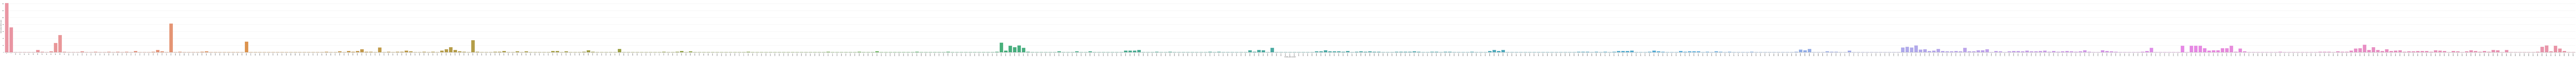

In [9]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(users_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Benutzern pro courseid für alle Studiengänge
result = users_per_course
# Visualisierung der Mengen an unterschiedlichen Benutzern pro courseid für alle Studiengänge
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number distinct users')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 0

In [10]:
users_per_course = moodle_data.userid[moodle_data.Studiengang.astype(int) == 0].groupby(moodle_data.courseid).nunique().sort_values()
display(users_per_course)

courseid
11777      1
23063      1
24041      1
24443      1
24469      1
        ... 
26890     10
2466      31
1         72
1750      83
0        142
Name: userid, Length: 294, dtype: int64

In [11]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(users_per_course.describe())

count    294.000000
mean       2.819728
std       10.522436
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      142.000000
Name: userid, dtype: float64

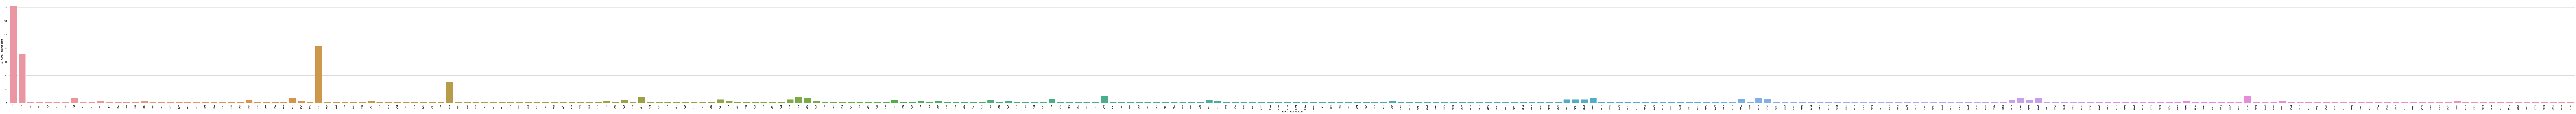

In [12]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(users_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 0
result = users_per_course
# Visualisierung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 0
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number distinct users')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 1

In [13]:
users_per_course = moodle_data.userid[moodle_data.Studiengang.astype(int) == 1].groupby(moodle_data.courseid).nunique().sort_values()
display(users_per_course)

courseid
24470     1
22217     1
22232     1
22241     1
24468     1
         ..
27419    16
27421    20
28233    22
627      27
629      50
Name: userid, Length: 103, dtype: int64

In [14]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(users_per_course.describe())

count    103.000000
mean       4.543689
std        6.766087
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       50.000000
Name: userid, dtype: float64

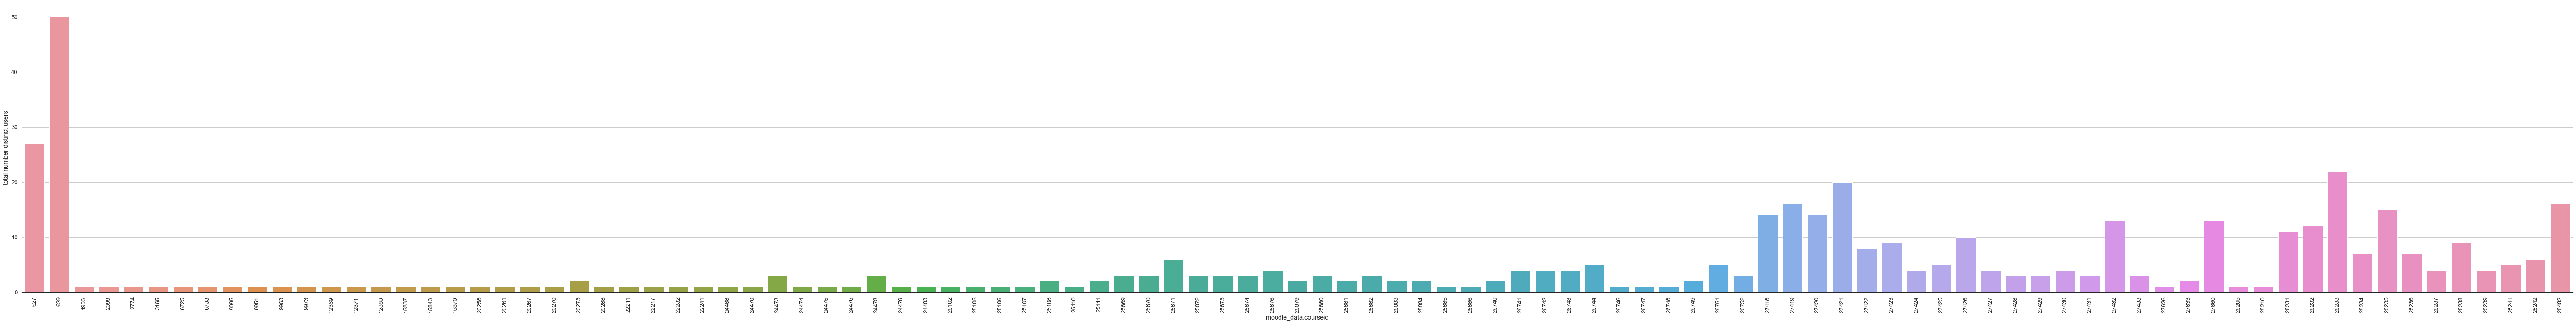

In [15]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(users_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 1
result = users_per_course
# Visualisierung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 1
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number distinct users')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 2

In [16]:
users_per_course = moodle_data.userid[moodle_data.Studiengang.astype(int) == 2].groupby(moodle_data.courseid).nunique().sort_values()
display(users_per_course)

courseid
27174     1
26756     1
26762     1
26765     1
26768     1
         ..
28264     7
28267     7
27493     9
4217     14
4245     35
Name: userid, Length: 112, dtype: int64

In [17]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(users_per_course.describe())

count    112.000000
mean       2.857143
std        3.695279
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       35.000000
Name: userid, dtype: float64

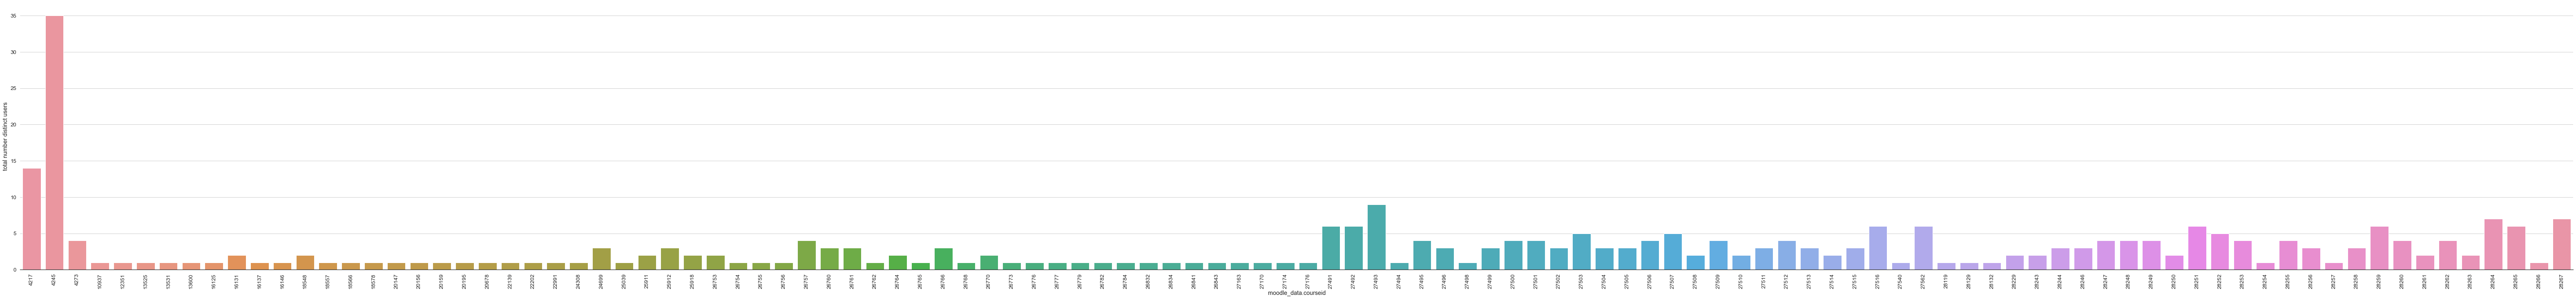

In [18]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(users_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 2
result = users_per_course
# Visualisierung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 2
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number distinct users')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 3

In [19]:
users_per_course = moodle_data.userid[moodle_data.Studiengang.astype(int) == 3].groupby(moodle_data.courseid).nunique().sort_values()
display(users_per_course)

courseid
28513     3
28560     4
24047     5
27814     5
27815     6
27816     6
26889     6
26888     8
27848    11
28515    11
27818    12
27813    12
27817    12
24051    13
25568    13
24049    15
27819    19
28514    19
27812    19
27810    19
27781    19
24048    19
27811    19
28512    20
24050    20
24046    28
Name: userid, dtype: int64

In [20]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(users_per_course.describe())

count    26.000000
mean     13.192308
std       6.542288
min       3.000000
25%       6.500000
50%      12.500000
75%      19.000000
max      28.000000
Name: userid, dtype: float64

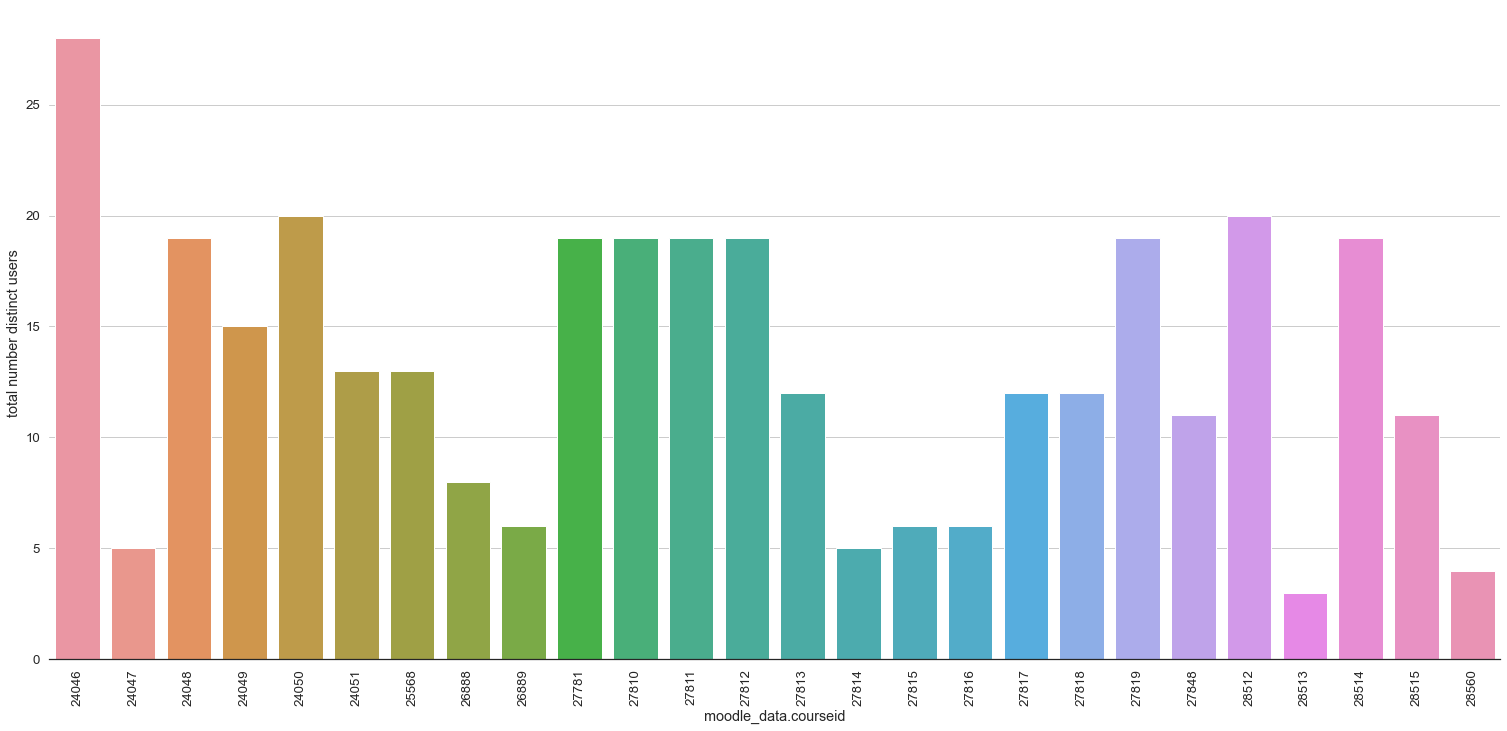

In [21]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(users_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 3
result = users_per_course
# Visualisierung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 3
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number distinct users')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 4

In [22]:
users_per_course = moodle_data.userid[moodle_data.Studiengang.astype(int) == 4].groupby(moodle_data.courseid).nunique().sort_values()
display(users_per_course)

courseid
3985      1
27747     1
27780     1
28103     1
28345     1
28109     1
27231     1
26687     1
27587     1
26656     1
26521     1
28222     1
26435     1
25907     1
25752     1
25751     1
25673     1
24221     1
28337     1
28344     1
26517     1
27739     1
28221     2
28218     2
28217     2
28110     2
28228     2
27518     2
27584     2
26719     2
26685     2
26682     2
26681     2
4759      2
28481     2
27583     3
27439     3
28223     3
27582     4
4209      4
27637     4
27129     5
28230     5
4237     15
Name: userid, dtype: int64

In [23]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(users_per_course.describe())

count    44.000000
mean      2.136364
std       2.278217
min       1.000000
25%       1.000000
50%       1.500000
75%       2.000000
max      15.000000
Name: userid, dtype: float64

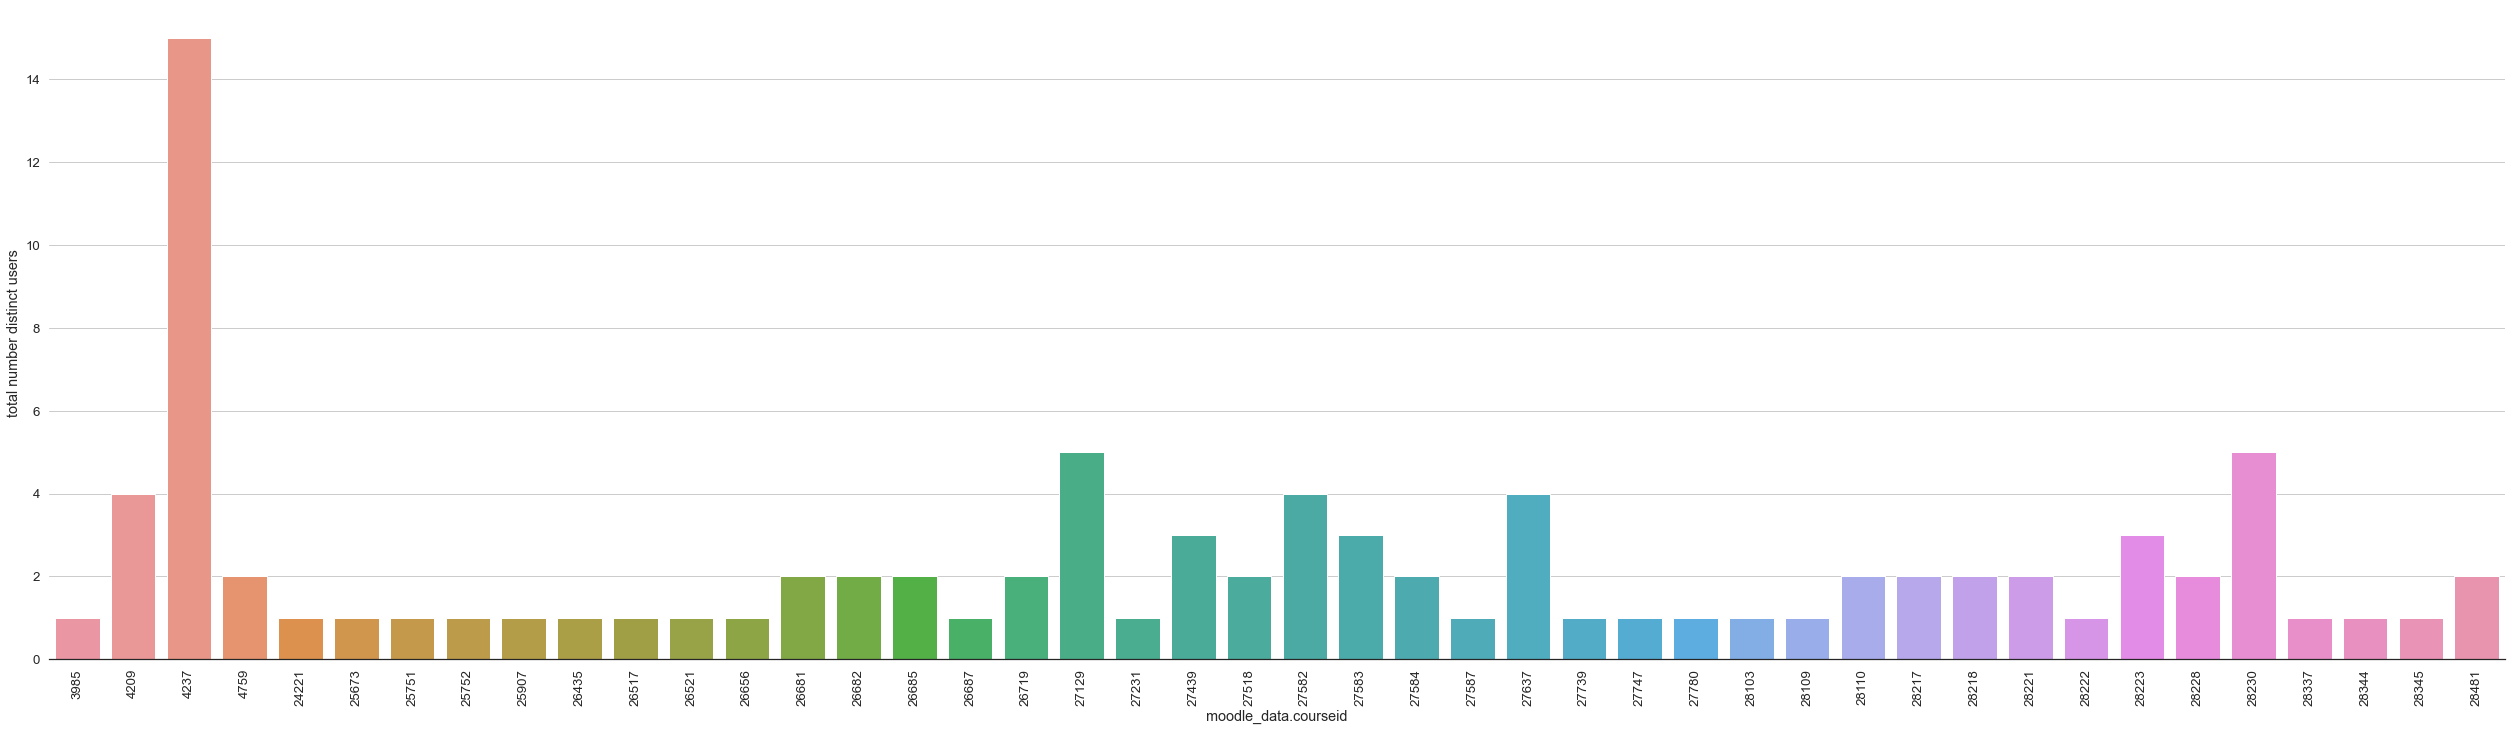

In [24]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(users_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 4
result = users_per_course
# Visualisierung der Mengen an unterschiedlichen Benutzern pro courseid für den Studiengang 4
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number distinct users')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()